In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Microarray data clustering

Rosenwald, Andreas, et al. "The use of molecular profiling to predict survival after chemotherapy for diffuse large-B-cell lymphoma." New England Journal of Medicine 346.25 (2002): 1937-1947.

http://www.nejm.org/doi/full/10.1056/NEJMoa012914#t=article  
"Hierarchical clustering was used to define subgroups of diffuse large-B-cell lymphoma."

Data:  
http://llmpp.nih.gov/DLBCL/

In [2]:
import pandas as pd

In [3]:
def RedBlackGreen():
    cdict = {'red':   ((0.0, 0.0, 0.0),
                       (0.5, 0.0, 0.1),
                       (0.7, 1.0, 1.0),
                       (1.0, 1.0, 1.0)),
    
             'blue': ((0.0, 0.0, 0.0),
                      (1.0, 0.0, 0.0)),
    
             'green':  ((0.0, 0.0, 1.0),
                        (0.3, 1.0, 1.0),
                       (0.5, 0.1, 0.0),
                       (1.0, 0.0, 0.0))
            }
    
    my_cmap = matplotlib.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return my_cmap

redblackgreen = RedBlackGreen()

In [4]:
df = pd.read_csv("Fig1A.cdt", sep="\t", index_col=['UNIQID'])
df = df.iloc[2:, 3:-2]

df2 = df.astype(float).fillna(0)
X = df2.values.T

In [6]:
df

,Unnamed: 4,MLC94-46_LYM009_de novo untreated,MLC96-45_LYM186_de novo untreated,MLC91-27_LYM427_de novo untreated,MLC96-84_LYM225_transformed,MLC95-43_LYM095_de novo untreated,MLC91-28_LYM428_de novo untreated,MLC94-50_LYM004_de novo untreated,MLC95-46_LYM098_de novo untreated,MLC95-62_LYM114_de novo untreated,...,MLC95-33_LYM086_de novo untreated,MLC91-25_LYM425_de novo untreated,MLC91-72_LYM316_de novo untreated,MLC95-25_LYM078_de novo untreated,MLC96-24_LYM166_de novo untreated,MLC96-75_LYM216_de novo untreated,MLC95-82_LYM134_de novo untreated,MLC91-40_LYM408_de novo untreated,MLC94-62_LYM022_de novo untreated,MLC96-65_LYM206_transformed
UNIQID,,,,,,,,,,,,,,,,,,,,,
24328.0,NaN,-0.8001,0.1177,-0.4652,-0.3716,0.264,-0.714,NaN,0.014,1.16,...,NaN,NaN,0.1761,0.1483,0.1528,-0.569,NaN,-0.3656,1.457,0.5289
16380.0,NaN,-0.2213,0.7107,0.6151,0.4084,-0.761,0.332,NaN,NaN,NaN,...,-0.0468,-2.553,-1.214,0.5187,-0.4115,NaN,0.7886,-0.1359,NaN,-0.4724
24291.0,0.6761,1.573,1.125,1.424,0.9534,1.695,1.241,1.648,2.189,0.9091,...,1.901,2.855,2.613,0.4178,0.3088,-2.496,0.0826,1.837,3.355,0.9652
24315.0,0.5599,0.1023,-0.1942,1.391,1.111,-0.2267,3.616,0.109,-1.224,NaN,...,1.072,-0.9451,0.3591,-1.762,-1.475,-1.984,-2.699,-0.0167,2.746,0.7516
24336.0,0.0224,0.8179,0.7564,-0.8884,-1.607,1.236,0.2475,1.03,1.583,-0.0509,...,1.683,NaN,0.3609,2.105,0.872,1.394,0.4092,1.585,-0.746,1.221
24342.0,-0.723,-0.4928,0.3254,0.0691,-0.1172,0.089,-0.9011,-0.4608,1.2,0.5062,...,-0.6716,0.4466,0.7323,-0.1905,-0.2308,0.359,0.3445,0.3164,0.8287,0.592
33258.0,0.8084,0.8356,-0.1442,-0.2339,-0.2645,-0.1333,-0.145,0.1837,-0.7059,0.2237,...,0.1506,0.3614,NaN,0.7701,0.0898,0.2542,-0.2489,0.9619,0.6301,0.6305
24312.0,NaN,1.329,-1.166,0,NaN,NaN,0.6037,-2.104,-1.663,NaN,...,-1.578,-0.5687,-0.025,0.3034,0.2766,-2.747,-1.323,0.7712,NaN,1.239
16128.0,NaN,0.3373,0.2512,-0.1297,-0.0767,NaN,-0.6275,-0.7652,0.4319,-0.0011,...,NaN,NaN,-1.418,0.2848,0.8346,-0.2553,NaN,-0.6454,-0.3159,-0.6795


In [8]:
df.shape

(100, 274)

In [9]:
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as dist

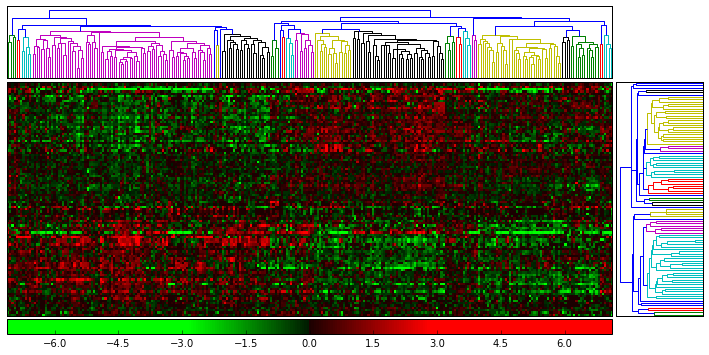

In [10]:
# Compute and plot first dendrogram.
fig = pylab.figure(figsize=(12,5))
ax1 = fig.add_axes([0.1,0.71,0.7,0.2])
Y = sch.linkage(dist.pdist(X, 'correlation'), method='average')
Z1 = sch.dendrogram(Y)
ax1.set_xticks([])
ax1.set_yticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.805,0.05,0.1,0.65])
Y = sch.linkage(dist.pdist(X.T, 'correlation'), method='average')
Z2 = sch.dendrogram(Y, orientation='left')
ax2.set_xticks([])
ax2.set_yticks([])

# Plot distance matrix.
axmatrix = fig.add_axes([0.1,0.05,0.7,0.65])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
X = X[idx1,:]
X = X[:,idx2]
norm = plt.cm.colors.Normalize(vmax=abs(X).max(), vmin=-abs(X).max())
im = axmatrix.matshow(X.T, aspect='auto', origin='lower', cmap=redblackgreen, norm=norm)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# # Plot colorbar.
axcolor = fig.add_axes([0.1,0.,0.7,0.04])
pylab.colorbar(im, cax=axcolor, orientation='horizontal');

"Panel A shows the hierarchical clustering of diffuse large-B-cell lymphomas from 240 patients with untreated disease and 34 patients who had previously been treated or who had a preexisting low-grade lymphoma, according to the level of expression of 100 genes. Red areas indicate increased expression, and green areas decreased expression. Each column represents a single diffuse large-B-cell lymphoma, and each row represents a single gene. ..."

In [17]:
# piu' grande la distanza tra i path, piu' netta e' la distinzione tra i cluster